In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv(r'C:\Users\user\Desktop\fraud detection\creditcard.csv')

In [121]:
#df = df.drop('Time', axis=1)

In [126]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [124]:
x = np.asarray(df)[:,30]

In [125]:
np.sum(x==1)

492

In [10]:
df.duplicated().sum()

1081

We drop the dublicate rows.

In [13]:
df = df.drop_duplicates()

In [14]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

array([[<AxesSubplot:title={'center':'Class'}>]], dtype=object)

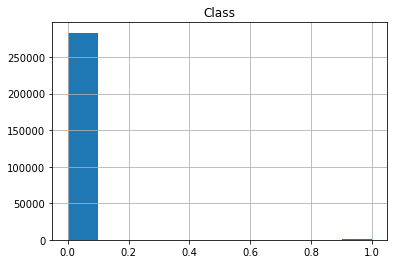

In [15]:
df.hist('Class')

In [81]:
X = np.asarray(df)[:,:30]
y = np.asarray(df)[:,30]

In [128]:
np.sum(y==0)

283253

In [17]:
print('Normal transactions:', round(np.sum(y==0)/y.shape[0] *100, 5), '%\nFraud  transactions: ', round(np.sum(y==1)/y.shape[0] * 100, 5), '%')

Normal transactions: 99.83329 %
Fraud  transactions:  0.16671 %


In [82]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.25, random_state=43)

In [83]:
print('Train\nNormal transactions:', round(np.sum(ytrain==0)/ytrain.shape[0] *100, 5), '%\nFraud  transactions: ', round(np.sum(ytrain==1)/ytrain.shape[0] * 100, 5), '%')

Train
Normal transactions: 99.83599 %
Fraud  transactions:  0.16401 %


In [84]:
print('Test\nNormal transactions:', round(np.sum(ytest==0)/ytest.shape[0] *100, 5), '%\nFraud  transactions: ', round(np.sum(ytest==1)/ytest.shape[0] * 100, 5), '%')

Test
Normal transactions: 99.82518 %
Fraud  transactions:  0.17482 %


In [129]:
import seaborn as sns

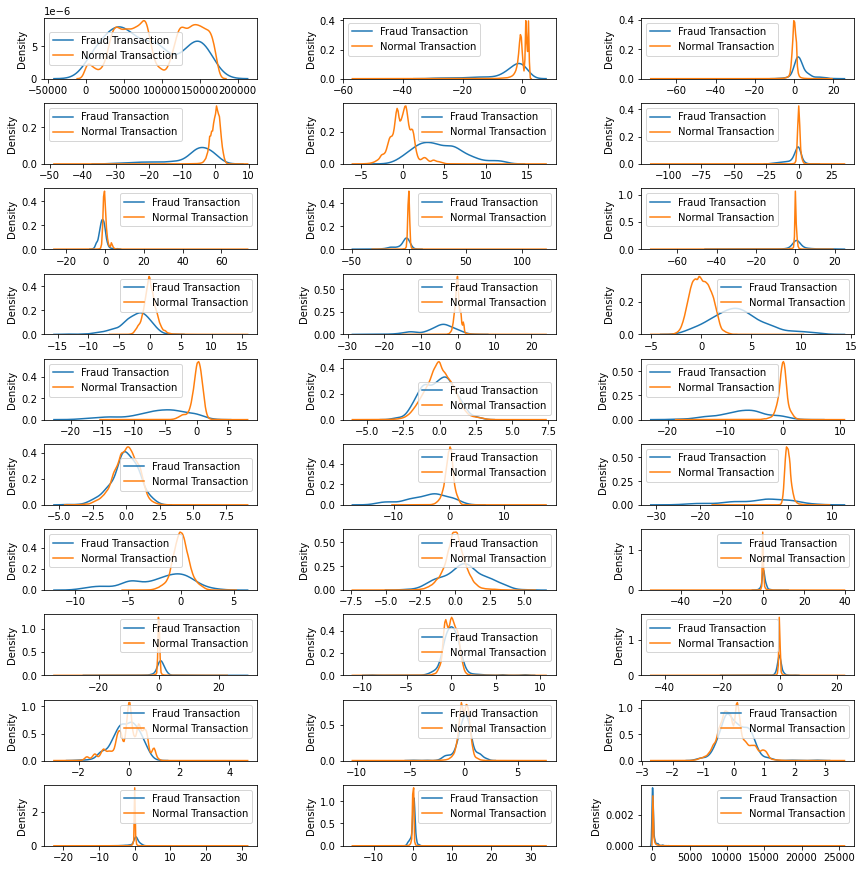

In [132]:
fig, axs = plt.subplots(10,3)
plt.subplots_adjust(wspace=.4, hspace=.4, top=3, right=2)
st = 0
for i in range(10):
    for j in range(3):
        sns.kdeplot(X[y==1,st], label='Fraud Transaction', ax=axs[i,j])
        sns.kdeplot(X[y==0,st], label='Normal Transaction', ax=axs[i,j])
        axs[i,j].legend()
        st += 1

plt.show()

We observe that we have imbalanced data.$$$$
We will compare several classifiers with and without several oversampling methods.

In [85]:
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import f1_score as f1
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
acc1 = []
rec1 = []
pre1 = []
f11 = []
acc2 = []
rec2 = []
pre2 = []
f12 = []
C = np.linspace(.1, 1.6, 15)
for c in C:
    l1 = LogisticRegression(penalty='l1', C=c, solver='liblinear', max_iter=1000).fit(Xtrain, ytrain)
    
    l2 = LogisticRegression(penalty='l2', C=c, solver='liblinear', max_iter=1000).fit(Xtrain, ytrain)
    
    acc1.append(l1.score(Xtest, ytest))
    rec1.append(recall(ytest, l1.predict(Xtest)))
    pre1.append(precision(ytest, l1.predict(Xtest)))
    f11.append(f1(ytest, l1.predict(Xtest)))
    
    acc2.append(l2.score(Xtest, ytest))
    rec2.append(recall(ytest, l2.predict(Xtest)))
    pre2.append(precision(ytest, l2.predict(Xtest)))
    f12.append(f1(ytest, l2.predict(Xtest)))

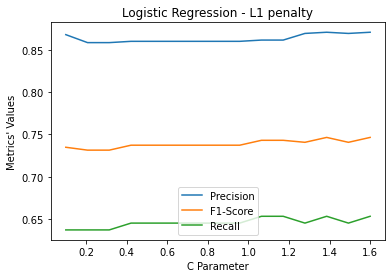

In [88]:
plt.plot(C, pre1, label='Precision')
plt.plot(C, f11, label='F1-Score')
plt.plot(C, rec1, label='Recall')
plt.title('Logistic Regression - L1 penalty')
plt.xlabel('C Parameter')
plt.ylabel('Metrics\' Values')
plt.legend()
plt.show()

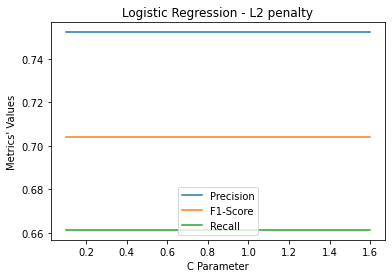

In [89]:
plt.plot(C, pre2, label='Precision')
plt.plot(C, f12, label='F1-Score')
plt.plot(C, rec2, label='Recall')
plt.title('Logistic Regression - L2 penalty')
plt.xlabel('C Parameter')
plt.ylabel('Metrics\' Values')
plt.legend()
plt.show()

We don't see any specific deffierence, so we 'll select l2-penalty and C=1.

In [36]:
def print_metrics(cl, Xtest, ytest):
    print('Accuracy:', cl.score(Xtest, ytest))
    print('Precision:', precision(ytest, cl.predict(Xtest)))
    print('F1-Score:', f1(ytest, cl.predict(Xtest)))
    print('Recall:', recall(ytest, cl.predict(Xtest)))

In [37]:
def FNR(ytrue, ypred):
    tn, fp, fn, tp = confusion_matrix(ytrue, ypred).ravel()
    return fn / (fn+tp)

def FPR(ytrue, ypred):
    tn, fp, fn, tp = confusion_matrix(ytrue, ypred).ravel()
    return fp / (fp+tn)

In [38]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

Accuracy: 0.9991964134664185
Precision: 0.8602150537634409
F1-Score: 0.7373271889400922
Recall: 0.6451612903225806


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


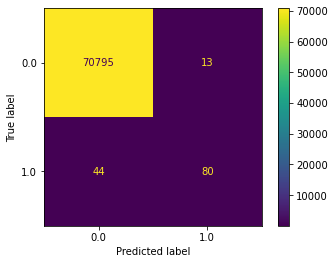

In [91]:
lr = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=1000).fit(Xtrain, ytrain)
print_metrics(lr, Xtest, ytest)
plot_confusion_matrix(lr, Xtest, ytest)

In [92]:
FNR(ytest, lr.predict(Xtest))

0.3548387096774194

In [93]:
FPR(ytest, lr.predict(Xtest))

0.00018359507400293753

We see that without any oversampling we take 0.35 False Negative Rate.$$$$
We consider False Negative Rate (FNR) as one of the most important metrics used as evaluation metrics for our model. Our goal is to minimize it.$$$$
Below we will try SMOTE oversampling for the same model.

In [94]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

In [95]:
Xr, yr = SMOTE().fit_resample(Xtrain, ytrain)

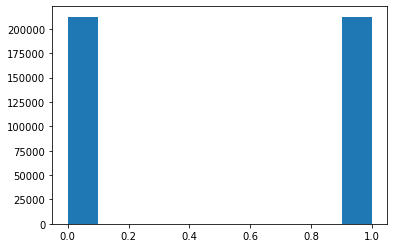

In [96]:
plt.hist(yr)
plt.show()

Accuracy: 0.9913297242429369
Precision: 0.15760111576011157
F1-Score: 0.26872770511296074
Recall: 0.9112903225806451


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


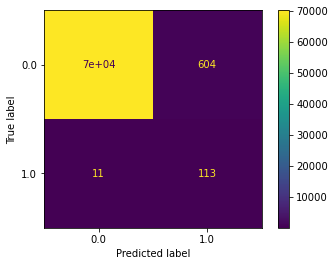

In [101]:
lr2 = LogisticRegression(C=1, solver='liblinear', max_iter=1000, penalty='l1').fit(Xr, yr)
print_metrics(lr2, Xtest, ytest)
plot_confusion_matrix(lr2, Xtest, ytest)

In [102]:
FNR(ytest, lr2.predict(Xtest))

0.08870967741935484

In [103]:
FPR(ytest, lr2.predict(Xtest))

0.008530109592136481

We see that after using the classic SMOTE oversampling algorithm to our training set, FNR drops to 0.09 and False Positive Rate (FPR) rise almost 10 times!

We also observe that precision drops to 0.15 while recall rise to 0.91.$$$$
That's a huge trade-off we have to pay for the drop of FNR.$$$$
We continue using Borderline SMOTE.

In [100]:
Xr1, yr1 = BorderlineSMOTE().fit_resample(Xtrain, ytrain)

Accuracy: 0.9973213782213951
Precision: 0.3829787234042553
F1-Score: 0.5320197044334976
Recall: 0.8709677419354839


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


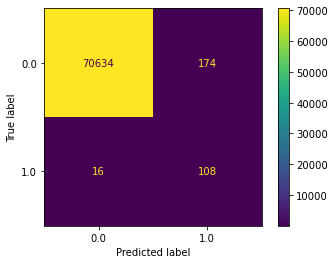

In [104]:
lr3 = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=1000).fit(Xr1, yr1)
print_metrics(lr3, Xtest, ytest)
plot_confusion_matrix(lr3, Xtest, ytest)

In [105]:
FNR(ytest, lr3.predict(Xtest))

0.12903225806451613

In [106]:
FPR(ytest, lr3.predict(Xtest))

0.0024573494520393176

Based on precision, we get better results.

In [107]:
from sklearn.naive_bayes import GaussianNB

In [108]:
gnb = GaussianNB().fit(Xtrain, ytrain)
print_metrics(gnb, Xtest, ytest)

Accuracy: 0.9928241132352111
Precision: 0.14678899082568808
F1-Score: 0.2391629297458894
Recall: 0.6451612903225806


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


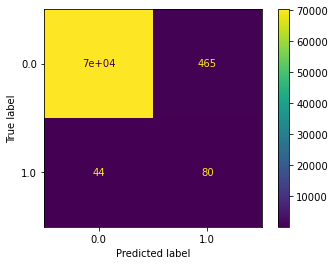

In [109]:
plot_confusion_matrix(gnb, Xtest, ytest)

In [110]:
FNR(ytest, gnb.predict(Xtest))

0.3548387096774194

In [111]:
FPR(ytest, gnb.predict(Xtest))

0.006567054570105073

In [112]:
gnb1 = GaussianNB().fit(Xr, yr)

Accuracy: 0.9924152709637399
Precision: 0.15953947368421054
F1-Score: 0.2650273224043716
Recall: 0.782258064516129


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


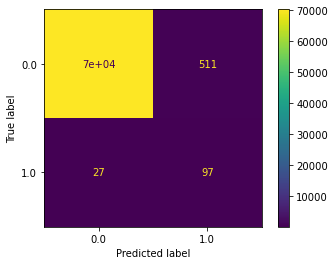

In [113]:
print_metrics(gnb1, Xtest, ytest)
plot_confusion_matrix(gnb1, Xtest, ytest)

In [114]:
FNR(ytest, gnb1.predict(Xtest))

0.21774193548387097

In [115]:
FPR(ytest, gnb1.predict(Xtest))

0.007216698678115467

Accuracy: 0.9957846952010376
Precision: 0.22910216718266255
F1-Score: 0.331096196868009
Recall: 0.5967741935483871


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


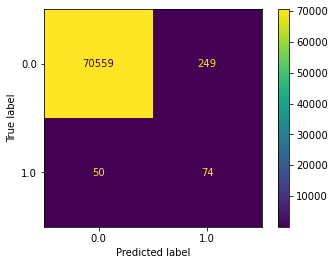

In [116]:
gnb2 = GaussianNB().fit(Xr1, yr1)
print_metrics(gnb2, Xtest, ytest)
plot_confusion_matrix(gnb2, Xtest, ytest)

In [117]:
FNR(ytest, gnb2.predict(Xtest))

0.4032258064516129

In [118]:
FPR(ytest, gnb2.predict(Xtest))

0.003516551802056265

We see that no matter what oversampling method we use, logistic regression produces lower FNR than Gaussian Naive Bayes.

In [133]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [136]:
acc1 = []
rec1 = []
pre1 = []
f11 = []
acc2 = []
rec2 = []
pre2 = []
f12 = []
depth = np.linspace(1, 6, 6)
for c in depth:
    t1 = dtc(criterion='entropy').fit(Xtrain, ytrain)
    
    t2 = dtc(criterion='gini').fit(Xtrain, ytrain)
    
    acc1.append(t1.score(Xtest, ytest))
    rec1.append(recall(ytest, t1.predict(Xtest)))
    pre1.append(precision(ytest, t1.predict(Xtest)))
    f11.append(f1(ytest, t1.predict(Xtest)))
    
    acc2.append(t2.score(Xtest, ytest))
    rec2.append(recall(ytest, t2.predict(Xtest)))
    pre2.append(precision(ytest, t2.predict(Xtest)))
    f12.append(f1(ytest, t2.predict(Xtest)))

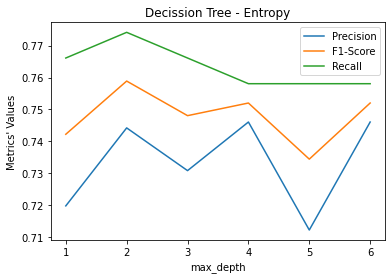

In [138]:
plt.plot(depth, pre1, label='Precision')
plt.plot(depth, f11, label='F1-Score')
plt.plot(depth, rec1, label='Recall')
plt.title('Decission Tree - Entropy')
plt.xlabel('max_depth')
plt.ylabel('Metrics\' Values')
plt.legend()
plt.show()

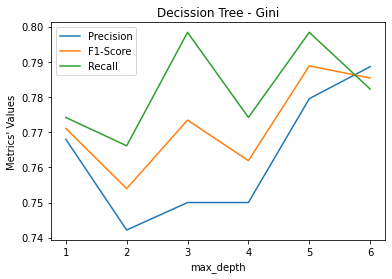

In [139]:
plt.plot(depth, pre2, label='Precision')
plt.plot(depth, f12, label='F1-Score')
plt.plot(depth, rec2, label='Recall')
plt.title('Decission Tree - Gini')
plt.xlabel('max_depth')
plt.ylabel('Metrics\' Values')
plt.legend()
plt.show()

In [141]:
dt1 = dtc(criterion='entropy').fit(Xtrain, ytrain)

In [142]:
dt2 = dtc(criterion='gini').fit(Xtrain, ytrain)

In [143]:
print_metrics(dt1, Xtest, ytest)

Accuracy: 0.99908362939153
Precision: 0.7286821705426356
F1-Score: 0.7430830039525692
Recall: 0.7580645161290323


In [144]:
print_metrics(dt2, Xtest, ytest)

Accuracy: 0.999281001522585
Precision: 0.792
F1-Score: 0.7951807228915663
Recall: 0.7983870967741935


So we choose max_depth=5 and criterion=gini.

In [159]:
d = dtc(criterion='gini', max_depth=5).fit(Xtrain, ytrain)

Accuracy: 0.9994078836068347
Precision: 0.8796296296296297
F1-Score: 0.8189655172413792
Recall: 0.7661290322580645


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


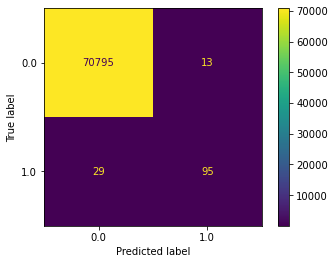

In [160]:
print_metrics(d, Xtest, ytest)
plot_confusion_matrix(d, Xtest, ytest)

In [161]:
FNR(ytest, d.predict(Xtest))

0.23387096774193547

In [162]:
FPR(ytest, d.predict(Xtest))

0.00018359507400293753

In [163]:
d1 = dtc(criterion='gini', max_depth=5).fit(Xr, yr)

Accuracy: 0.9868183612473919
Precision: 0.10896817743490839
F1-Score: 0.19465977605512488
Recall: 0.9112903225806451


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


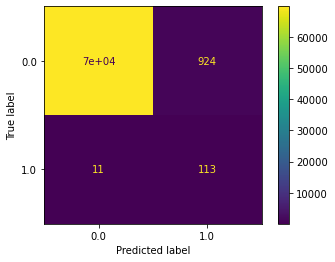

In [164]:
print_metrics(d1, Xtest, ytest)
plot_confusion_matrix(d1, Xtest, ytest)

In [165]:
FNR(ytest, d1.predict(Xtest))

0.08870967741935484

In [166]:
FPR(ytest, d1.predict(Xtest))

0.01304937295220879

In [167]:
d2 = dtc(criterion='gini', max_depth=5).fit(Xr1, yr1)

Accuracy: 0.9965459877065358
Precision: 0.3183183183183183
F1-Score: 0.4638949671772429
Recall: 0.8548387096774194


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


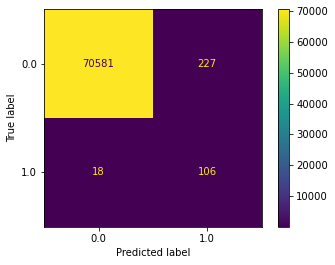

In [168]:
print_metrics(d2, Xtest, ytest)
plot_confusion_matrix(d2, Xtest, ytest)

In [169]:
FNR(ytest, d2.predict(Xtest))

0.14516129032258066

In [170]:
FPR(ytest, d2.predict(Xtest))

0.0032058524460512935